In [66]:
#import packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [18]:
#open the compiled CSV without the 
bacterial_csv = pd.read_csv('compiled_final.csv')
df = pd.DataFrame(data=bacterial_csv)
df

,GENENAME,ORG,ENTREZID,LOG2FC
0,ABC_transporter,PA,879411,-0.038469
1,ABC_transporter,PA,883108,-0.207718
2,ABC_transporter,PA,878380,-0.187309
3,ABC_transporter,PA,880771,0.085173
4,ABC_transporter,PA,879023,0.038834
...,...,...,...,...
431,RNA_polymerase,BS,939937,-0.055848
432,RNA_polymerase,BS,936362,-0.140629
433,RNA_polymerase,BS,938729,-0.528350
434,RNA_polymerase,BS,939953,0.303125


In [51]:
# creating a dict file  
gene_clust = {'ABC_transporter': 1,'cytochrome': 2, 'DNA_polymerase':3, 'efflux_transporter':4,
              'electron_transfer':5, 'flagellar_motility':6, 'NADH_NADPH':7, 'RNA_polymerase':8} 
org_id = {'PA': 1,'EC': 2, 'BS':3}

In [20]:
df.GENENAME = [gene_clust[item] for item in df.GENENAME] 
df

,GENENAME,ORG,ENTREZID,LOG2FC
0,1,PA,879411,-0.038469
1,1,PA,883108,-0.207718
2,1,PA,878380,-0.187309
3,1,PA,880771,0.085173
4,1,PA,879023,0.038834
...,...,...,...,...
431,8,BS,939937,-0.055848
432,8,BS,936362,-0.140629
433,8,BS,938729,-0.528350
434,8,BS,939953,0.303125


In [52]:
df.ORG = [org_id[item] for item in df.ORG] 

In [53]:
df

,GENENAME,ORG,ENTREZID,LOG2FC
0,1,1,879411,-0.038469
1,1,1,883108,-0.207718
2,1,1,878380,-0.187309
3,1,1,880771,0.085173
4,1,1,879023,0.038834
...,...,...,...,...
431,8,3,939937,-0.055848
432,8,3,936362,-0.140629
433,8,3,938729,-0.528350
434,8,3,939953,0.303125


In [54]:
#split input/output data
X= df[['GENENAME','ORG']]
y= df['LOG2FC']

seed = 5
n_estim = 100
#split train:test = 0.75:0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= seed)

In [55]:
#Train using AdaBoostRegressor
regr = AdaBoostRegressor(random_state=seed, n_estimators=n_estim)
regr.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=5)

In [56]:
#Predict the test set
y_pred = regr.predict(X_test)

score(X_train,Y_train) is measuring the accuracy of the model against the training data. <br>
(How well the model explains the data it was trained with). <-- But note that this has nothing to do with test data.

In [104]:
#Predicting and checking the accuracy

# compute the score on the model (using score and MSE)
score = regr.score(X_train, y_train)
print("score: %.2f" % score.mean()) 
print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))

score: 0.15
Prediction accuracy MSE:  0.050092146001420354


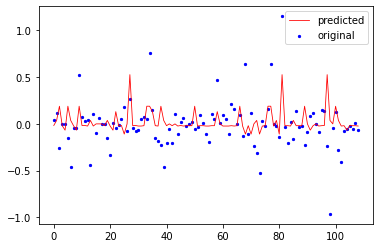

In [65]:
#visualize the original and predicted test data in a plot.
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#### Trying AdaBoost Regressor with different split of test/train
0.70:0.30 = score 0.12
0.75:0.25 = score 0.15
0.80:0.20 = score 0.15

In [100]:
seed = 5
n_estim = 100
#split train:test = 0.80:0.20
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, random_state= seed)

In [101]:
#Train using AdaBoostRegressor
regr = AdaBoostRegressor(random_state=seed, n_estimators=n_estim)
regr.fit(X_train1, y_train1)

AdaBoostRegressor(n_estimators=100, random_state=5)

In [102]:
#Predict the test set
y_pred1 = regr.predict(X_test1)

In [103]:
#Predicting and checking the accuracy

# compute the score on the model (using score and MSE)
score1 = regr.score(X_train1, y_train1)
print("score: %.2f" % score1.mean()) 
print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))

score: 0.15
Prediction accuracy MSE:  0.050092146001420354


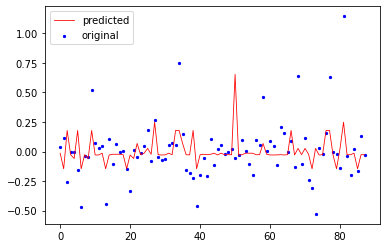

In [110]:
#visualize the original and predicted test data in a plot.
x_ax1 = range(len(y_test1))
plt.scatter(x_ax1, y_test1, s=5, color="blue", label="original")
plt.plot(x_ax1, y_pred1, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [106]:
seed = 5
n_estim = 100
#split train:test = 0.70:0.30
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state= seed)

In [107]:
#Train using AdaBoostRegressor
regr = AdaBoostRegressor(random_state=seed, n_estimators=n_estim)
regr.fit(X_train2, y_train2)

AdaBoostRegressor(n_estimators=100, random_state=5)

In [108]:
#Predict the test set
y_pred2 = regr.predict(X_test2)

In [109]:
#Predicting and checking the accuracy

# compute the score on the model (using score and MSE)
score2 = regr.score(X_train2, y_train2)
print("score: %.2f" % score2.mean()) 
print("Prediction accuracy MSE: ", mean_squared_error(y_test2, y_pred2))

score: 0.12
Prediction accuracy MSE:  0.06722079256953017


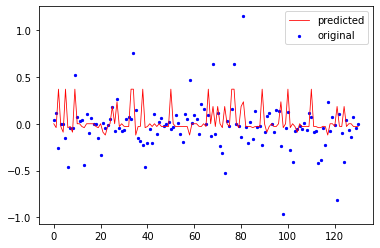

In [111]:
#visualize the original and predicted test data in a plot.
x_ax2 = range(len(y_test2))
plt.scatter(x_ax2, y_test2, s=5, color="blue", label="original")
plt.plot(x_ax2, y_pred2, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#### BAD!! Boosting Decision tree regressor with Adaboost Regressor

In [70]:
# Fit regression model using Decision Tree Regressor
# Change max depth, calculate score and MSE in a list
#create a function to iterate over a for-loop and generate MSE's in a list


def change_max_depth(md_list):
    #Function takes a list of different max_depth values and collect their MSE in a list
    MSE_list = []
    for i in range(len(md_list)):
        regr = DecisionTreeRegressor(max_depth=md_list[i])
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        MSE_temp = mean_squared_error(y_test, y_pred)
        MSE_list.append(MSE_temp)
    
    return MSE_list

In [71]:
#for each of max_depth = [2, 5, 10, 50, 100] and store the MSE in a list
max_depth = [2, 5, 10, 50, 100]
MSE_all = change_max_depth(max_depth)
print(MSE_all)

[0.056297548200490946, 0.05224121701217711, 0.0507955130766387, 0.0507955130766387, 0.0507955130766387]


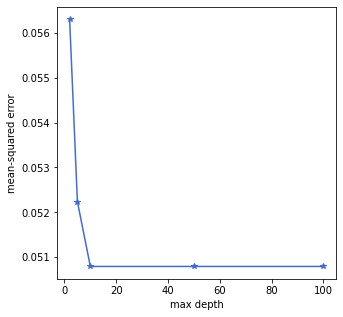

In [73]:
#create plot
plt.figure(figsize=(5,5))
plt.plot(max_depth,MSE_all,'-*', color='royalblue')
plt.xlabel('max depth')
plt.ylabel('mean-squared error')
plt.show()

In [92]:
#Boost with AdaBoost
regr_DTR = DecisionTreeRegressor(max_depth=100)

regr_ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10),
                          n_estimators=n_estim, random_state=seed)

# Fit regression model
regr_DTR.fit(X_train, y_train)
regr_ABR.fit(X_train, y_train)

# Predict
y_DTR = regr_DTR.predict(X_test)
y_ABR = regr_ABR.predict(X_test)

In [93]:
#Predicting and checking the accuracy

# compute the score on the model (using score and MSE)
score_DTR = regr_DTR.score(X_train, y_train)
score_ABR = regr_ABR.score(X_train, y_train)
print("score Decision Tree Reg: %.2f" % score_DTR.mean()) 
print("score AdaBoost Reg: %.2f" % score_ABR.mean()) 
print("Prediction accuracy MSE from Decission Tree Reg: ", mean_squared_error(y_test, y_DTR))
print("Prediction accuracy MSE from AdaBoost Reg: ", mean_squared_error(y_test, y_ABR))

score Decision Tree Reg: 0.22
score AdaBoost Reg: 0.19
Prediction accuracy MSE from Decission Tree Reg:  0.0507955130766387
Prediction accuracy MSE from AdaBoost Reg:  0.05174136390259176


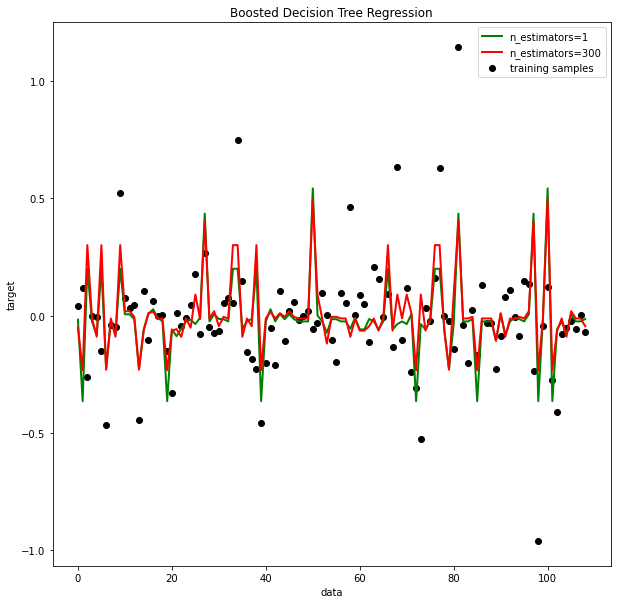

In [94]:
# #visualize the original and predicted test data in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(10,10))
plt.scatter(x_ax, y_test, c="k", label="training samples")
plt.plot(x_ax, y_DTR, c="g", label="n_estimators=1", linewidth=2)
plt.plot(x_ax, y_ABR, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()


LEARNING AdaBoost!

In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [27]:
#Preparing data
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15)

In [50]:
#convert boston data to df
boston_df= pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [33]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [28]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [29]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [34]:
#Defining the model
ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None) 

AdaBoostRegressor(n_estimators=100)


AdaBoostRegressor(n_estimators=100)

In [39]:
#Then, we'll fit the model with a train and test data

ada_reg.fit(xtrain, ytrain)

AdaBoostRegressor(n_estimators=100)

In [35]:
#Predicting and checking the accuracy
scores = cross_val_score(ada_reg, xtrain,ytrain,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean()) 

Mean cross-validataion score: 0.79


In [36]:
#We can also apply cross-validation with a k-fold method.
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.78


In [40]:
#predict test data and check its accuracy. Here, we'll use MSE and RMSE accuracy metrics
ypred = ada_reg.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 9.36
RMSE: 3.06


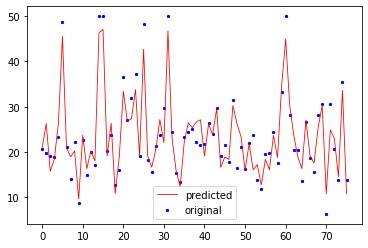

In [42]:
#visualize the original and predicted test data in a plot.
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()